## Regression


## Part A:Apply the Simple , Multiple  Linear regression  on 50_Startups.csv dataset  and polynomial Linear regression on Position_Salaries.csv dataset. Do the following:
1 .Visualizing the Training and Testing  set results
2. Encoding categorical data 
3.Visualising the Simple and Polynomial Regression results

Hint: Use "from sklearn.preprocessing import PolynomialFeatures" for polynomial regression.

In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

# Load the dataset
startups_df = pd.read_csv('50_Startups.csv')


In [4]:
# Extracting R&D Spend and Profit
X = startups_df[['R&D Spend']].values
y = startups_df['Profit'].values


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict the results
y_pred = simple_regressor.predict(X_test)


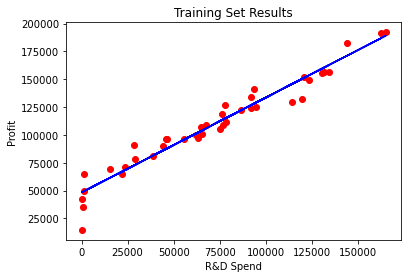

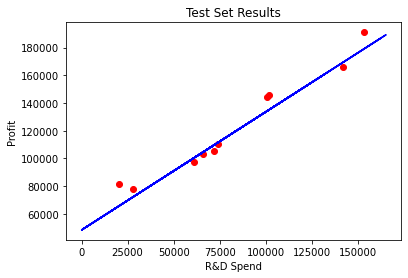

In [8]:

# Function to visualize Simple Linear Regression results
def visualize_simple_regression(X_train, y_train, X_test, y_test, y_pred):
    # Visualizing Training Set Results
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, simple_regressor.predict(X_train), color='blue')
    plt.title('Training Set Results')
    plt.xlabel('R&D Spend')
    plt.ylabel('Profit')
    plt.show()

    # Visualizing Test Set Results
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_train, simple_regressor.predict(X_train), color='blue')  # Using training data line
    plt.title('Test Set Results')
    plt.xlabel('R&D Spend')
    plt.ylabel('Profit')
    plt.show()

# Visualize results
visualize_simple_regression(X_train, y_train, X_test, y_test, y_pred)


In [7]:
data = pd.read_csv('Position_Salaries.csv')


In [8]:
# No categorical data to encode in Position_Salaries.csv
X = data.iloc[:, 1:2].values  # Feature: Position Level
y = data.iloc[:, 2].values    # Target: Salary


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Creating Polynomial Features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fitting Polynomial Regression to the dataset
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


LinearRegression()

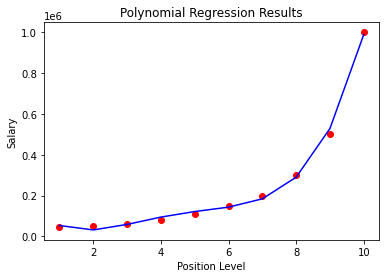

In [10]:
# Visualizing the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, poly_reg.predict(poly.fit_transform(X)), color='blue')
plt.title('Polynomial Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()



Part B:
The goal is to build a logistic regression model that predicts whether a student will be admitted to a university (admit = 1) or not (admit = 0) based on their GRE score, GPA, and the prestige of the undergraduate institution they attended.Dataset:
You are provided with a dataset containing information on applicants to a university. The dataset includes the following features:
A standardized test score used for graduate admissions (out of 340).
Grade Point Average during undergraduate studies (on a scale of 0 to 4).
Ranked from 1 to 4, with 1 being the most prestigious.
Binary variable indicating whether the student was admitted (1) or not (0).
Example Dataset:
GRE Score (X1)             GPA (X2)            Prestige (X3)             Admission Status (Y)
330                                      3.8                         2                             1
300                                      3.4                         3                             0
320                                      3.5                         2                             1
310                                     3.2                          4                             0
340                                     3.9                          1                             1
Perform the data preprocessing,

Model Development,

Prediction,

Evaluation,

Interpretation

In [13]:
#Logistic Regression
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
#Importing the dataset
dataset = {
    'GRE Score': [330, 300, 320, 310, 340],
    'GPA': [3.8, 3.4, 3.5, 3.2, 3.9],
    'Prestige': [2, 3, 2, 4, 1],
    'Admission Status': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(dataset)

In [21]:
X = df[['GRE Score', 'GPA', 'Prestige']]
y = df['Admission Status']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
print(X_train)

   GRE Score  GPA  Prestige
1        300  3.4         3
3        310  3.2         4
4        340  3.9         1


In [24]:
print(y_train)

1    0
3    0
4    1
Name: Admission Status, dtype: int64


In [25]:
print(X_test)

   GRE Score  GPA  Prestige
2        320  3.5         2
0        330  3.8         2


In [26]:
print(y_test)

2    1
0    1
Name: Admission Status, dtype: int64


In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
print(X_train)

[[-0.98058068 -0.33968311  0.26726124]
 [-0.39223227 -1.01904933  1.06904497]
 [ 1.37281295  1.35873244 -1.33630621]]


In [33]:
print(X_test)

[[ 1.96116135e-01 -7.40148683e-17 -5.34522484e-01]
 [ 7.84464541e-01  1.01904933e+00 -5.34522484e-01]]


In [34]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
#Predicting a new result
print(classifier.predict(sc.transform([[300,3.5,3]])))

[1]


In [40]:

#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_test = y_test.values.reshape(len(y_test), 1)
result = np.concatenate((y_pred, y_test), axis=1)

print(result)


[[0 1]
 [1 1]]


In [41]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 1]]


0.5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


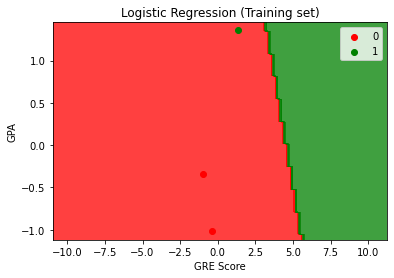

In [49]:
#Visualising the Training set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_train[:, [0, 1]], y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))

X_grid = np.array([X1.ravel(), X2.ravel()]).T
X_grid_full = np.c_[X_grid, np.full(X_grid.shape[0], 3)]  # Add a constant value for 'Prestige'

plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid_full)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

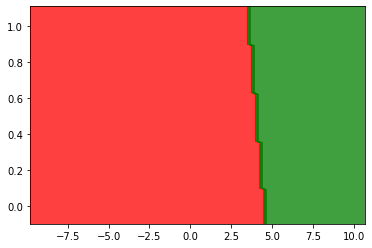

In [53]:
#Visualising the Test set results
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))

X_grid = np.array([X1.ravel(), X2.ravel()]).T
X_grid_full = np.c_[X_grid, np.full(X_grid.shape[0], 3)]  # Adding a constant value for the 'Prestige' feature

plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid_full)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()

